## Extraction

In [39]:
import geopandas as gpd
import pandas as pd

gdf20 = gpd.read_file("C:/Users/luiso/OneDrive/Documents/Bootkampf/NavAI/data/raw/Accesibilidad_2020/Accesibilidad.shp")
gdf21 = gpd.read_file("C:/Users/luiso/OneDrive/Documents/Bootkampf/NavAI/data/raw/Accesibilidad_2021/ACCESIBILIDAD_ACERAS_2021.shp")
gdf24 = gpd.read_file("C:/Users/luiso/OneDrive/Documents/Bootkampf/NavAI/data/raw/Accesibilidad_2024/ACCESIBILIDAD_ACERAS_2024.shp")

# Column names
print(gdf20.columns)
print(gdf21.columns)
print(gdf24.columns)

Index(['OBJECTID', 'SHAPE_Leng', 'SHAPE_Area', 'DISTRITO', 'ACTUACION',
       'CALLE', 'PROYECTO', 'P_P_NUEVOS', 'P_P_RENOVA', 'CALZADA_m2',
       'ACERA_m2', 'geometry'],
      dtype='object')
Index(['CALLE', 'DISTRITO', 'ACTUACIÓN', 'PROYECTO', 'PasPea_nue',
       'PasPea_Ren', 'SUP_Calzad', 'SUP_Acera', 'PP_N', 'PP_R', 'Estado',
       'Shape_STAr', 'Shape_STLe', 'd_Estado', 'geometry'],
      dtype='object')
Index(['distritotx', 'calle', 'supcalzada', 'supacera', 'pasosnuevo',
       'pasosrenov', 'estado', 'geometry'],
      dtype='object')


c:\Users\luiso\OneDrive\Documents\Bootkampf\NavAI\env\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
c:\Users\luiso\OneDrive\Documents\Bootkampf\NavAI\env\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Geometry of polygon of fid 19 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(


## Tranformation

In [40]:
gdf20.columns = [i.upper() for i in gdf20.columns]
gdf21.columns = [i.upper() for i in gdf21.columns]
gdf24.columns = [i.upper() for i in gdf24.columns]

column_rename = {
    #2020
    "CALZADA_M2":"ROAD_AREA",
    "DISTRITO":"DISTRICT",
    "P_P_NUEVOS":"NEW_SIDEWALKS",
    "P_P_RENOVA":"RENEWED_SIDEWALKS",
    "ACERA_M2":"SIDEWALKS_AREA",

    #2021
    "PASPEA_NUE":"NEW_SIDEWALKS",
    "PASPEA_REN":"RENEWED_SIDEWALKS",
    "SUP_CALZAD":"ROAD_AREA",
    "SUP_ACERA":"SIDEWALKS_AREA",
    "DISTRITO":"DISTRICT",

    #2024
    "DISTRITOTX":"DISTRICT",
    "SUPCALZADA":"ROAD_AREA",
    "SUPACERA":"SIDEWALKS_AREA",
    "PASOSNUEVO":"NEW_SIDEWALKS",
    "PASOSRENOV":"RENEWED_SIDEWALKS"
}

gdf20 = gdf20.rename(columns=column_rename)
gdf21 = gdf21.rename(columns=column_rename)
gdf24 = gdf24.rename(columns=column_rename)

gdf20 = gdf20[['DISTRICT','ROAD_AREA','SIDEWALKS_AREA','NEW_SIDEWALKS','RENEWED_SIDEWALKS','GEOMETRY']]
gdf21 = gdf21[['DISTRICT','ROAD_AREA','SIDEWALKS_AREA','NEW_SIDEWALKS','RENEWED_SIDEWALKS','GEOMETRY']]
gdf24 = gdf24[['DISTRICT','ROAD_AREA','SIDEWALKS_AREA','NEW_SIDEWALKS','RENEWED_SIDEWALKS','GEOMETRY']]

gdf20['YEAR'] = 2020
gdf21['YEAR'] = 2021
gdf24['YEAR'] = 2024

# Split DISTRICT
gdf20[['DISTRICT']] = gdf20['DISTRICT'].str.extract(r'\d+[\.\s]*(.*)')
gdf21[['DISTRICT']] = gdf21['DISTRICT'].str.extract(r'\d+[\.\s]*(.*)')
gdf24[['DISTRICT']] = gdf24['DISTRICT'].str.extract(r'\d+[\.\s]*(.*)')

In [41]:
# Ensure geometry column name is consistent
for df in [gdf20, gdf21, gdf24]:
    geom_col = [col for col in df.columns if df[col].dtype == 'geometry'][0]
    if geom_col != 'geometry':
        df.rename(columns={geom_col: 'geometry'}, inplace=True)
        df.set_geometry('geometry', inplace=True)
    
    df.set_crs("EPSG:25830", allow_override=True, inplace=True)

# Now concatenate
gdf = gpd.GeoDataFrame(
    pd.concat([gdf20, gdf21, gdf24], ignore_index=True),
    geometry='geometry'
)

In [42]:
corrections = {
    'Latina':'LATINA',
    'FUENCARRAL- EL PARDO':'FUENCARRAL-EL PARDO',
    'TETUÁN':'TETUAN',
    'VICÁLVARO':'VICALVARO',
    'CHAMARTÍN':'CHAMARTIN',
    'CHAMBERÍ':'CHAMBERI'
}

gdf['DISTRICT'] = gdf['DISTRICT'].replace(corrections)
gdf20['DISTRICT'] = gdf20['DISTRICT'].replace(corrections)
gdf20['DISTRICT'] = gdf21['DISTRICT'].replace(corrections)
gdf20['DISTRICT'] = gdf24['DISTRICT'].replace(corrections)

In [43]:
# Save CSVs
gdf.to_csv('../data/processed/dataset.csv', index=False)
gdf20.to_csv('../data/processed/dataset2020.csv', index=False)
gdf21.to_csv('../data/processed/dataset2021.csv', index=False)
gdf24.to_csv('../data/processed/dataset2024.csv', index=False)


In [44]:
import folium

# Centrar el mapa en Madrid
m = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Añadir capa GeoJSON
folium.GeoJson(gdf).add_to(m)
m

## EDA

In [46]:
gdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   DISTRICT           782 non-null    object  
 1   ROAD_AREA          782 non-null    float64 
 2   SIDEWALKS_AREA     782 non-null    float64 
 3   NEW_SIDEWALKS      770 non-null    object  
 4   RENEWED_SIDEWALKS  770 non-null    object  
 5   geometry           782 non-null    geometry
 6   YEAR               782 non-null    int64   
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 42.9+ KB


In [45]:
gdf.sample()

DISTRICT  ROAD_AREA  SIDEWALKS_AREA NEW_SIDEWALKS  \
541  SAN BLAS-CANILLEJAS       70.4           201.5             2   

    RENEWED_SIDEWALKS                                           geometry  YEAR  
541                 0  MULTIPOLYGON Z (((448578.402 4474895.895 2.65e...  2021

In [47]:
gdf.dtypes


DISTRICT               object
ROAD_AREA             float64
SIDEWALKS_AREA        float64
NEW_SIDEWALKS          object
RENEWED_SIDEWALKS      object
geometry             geometry
YEAR                    int64
dtype: object

In [48]:
gdf.isnull().sum()

DISTRICT              0
ROAD_AREA             0
SIDEWALKS_AREA        0
NEW_SIDEWALKS        12
RENEWED_SIDEWALKS    12
geometry              0
YEAR                  0
dtype: int64

In [49]:
gdf['DISTRICT'].value_counts(dropna=False)

DISTRICT
MONCLOA-ARAVACA        79
FUENCARRAL-EL PARDO    59
CARABANCHEL            59
TETUAN                 58
CENTRO                 54
CHAMARTIN              51
LATINA                 49
BARAJAS                43
HORTALEZA              39
SAN BLAS-CANILLEJAS    35
CIUDAD LINEAL          33
SALAMANCA              31
USERA                  30
PUENTE DE VALLECAS     29
VILLAVERDE             28
ARGANZUELA             27
RETIRO                 22
MORATALAZ              16
VICALVARO              16
VILLA DE VALLECAS      13
CHAMBERI               11
Name: count, dtype: int64

In [50]:
gdf['YEAR'].value_counts()

YEAR
2020    392
2021    202
2024    188
Name: count, dtype: int64

In [ ]:
gdf.groupby('YEAR')[['NEW_SIDEWALKS', 'RENEWED_SIDEWALKS', 'SIDEWALKS_AREA', 'ROAD_AREA']].sum()
# 2021 - NEW_SIDEWALKS ?

NEW_SIDEWALKS  \
YEAR                                                      
2020                                                407   
2021  1020000220000000001020000000000001390011160000...   
2024                                                132   

                                      RENEWED_SIDEWALKS  SIDEWALKS_AREA  \
YEAR                                                                      
2020                                               1128      1739610.34   
2021  2106620742010202110201073022046140610001300020...       285489.43   
2024                                                668       234886.92   

      ROAD_AREA  
YEAR             
2020  191145.06  
2021   82527.20  
2024   85115.90

In [ ]:
df.groupby(['DISTRICT', 'YEAR'])[['NEW_SIDEWALKS', 'RENEWED_SIDEWALKS']].sum().unstack()
#valores negativos?

NEW_SIDEWALKS RENEWED_SIDEWALKS
YEAR                         2024              2024
DISTRICT                                           
ARGANZUELA                      2                 8
BARAJAS                         0                 0
CARABANCHEL                     6               109
CENTRO                          4                56
CHAMARTÍN                     -10                65
CHAMBERÍ                        0                 0
CIUDAD LINEAL                   1                46
FUENCARRAL-EL PARDO             2                72
HORTALEZA                       2                 7
LATINA                          8                91
MONCLOA-ARAVACA                48                29
MORATALAZ                       1                 0
PUENTE DE VALLECAS              4                24
RETIRO                          1                 3
SALAMANCA                       0                 9
SAN BLAS-CANILLEJAS             9                 7
TETUÁN                         15                28
USERA                           9                46
VICÁLVARO                       0                 2
VILLA DE VALLECAS               1                 4
VILLAVERDE                     29                62

In [52]:
gdf.corr(numeric_only=True)

ROAD_AREA  SIDEWALKS_AREA      YEAR
ROAD_AREA        1.000000        0.364444 -0.003974
SIDEWALKS_AREA   0.364444        1.000000 -0.062847
YEAR            -0.003974       -0.062847  1.000000

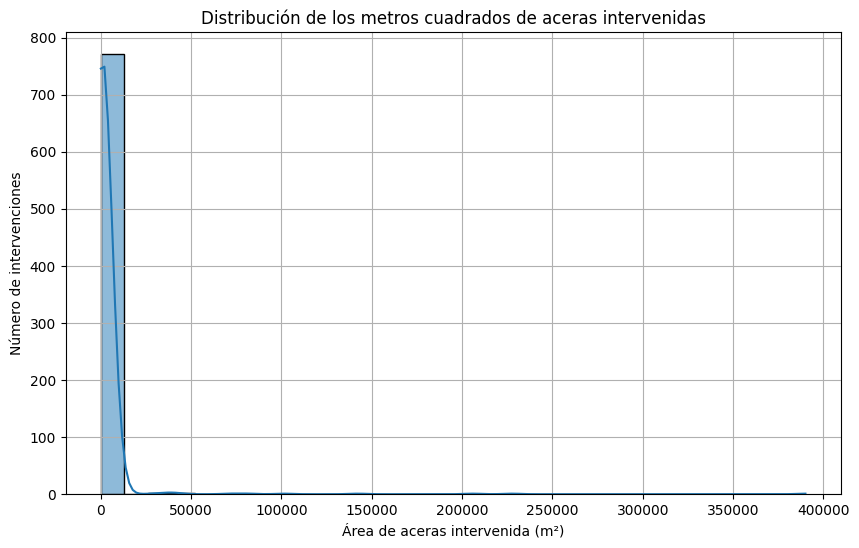

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de áreas de acera
plt.figure(figsize=(10, 6))
sns.histplot(data=gdf, x='SIDEWALKS_AREA', bins=30, kde=True)
plt.title('Distribución de los metros cuadrados de aceras intervenidas')
plt.xlabel('Área de aceras intervenida (m²)')
plt.ylabel('Número de intervenciones')
plt.grid(True)
plt.show()

## Statistics

In [ ]:
gdf.describe()

ROAD_AREA  SIDEWALKS_AREA         YEAR
count    782.000000      782.000000   782.000000
mean     458.808389     2890.008555  2021.219949
std     2928.604672    19283.641083     1.618621
min      -88.340000        0.000000  2020.000000
25%        0.000000      265.200000  2020.000000
50%        0.000000      685.750000  2020.000000
75%      256.265000     1533.077500  2021.000000
max    73290.000000   390100.000000  2024.000000

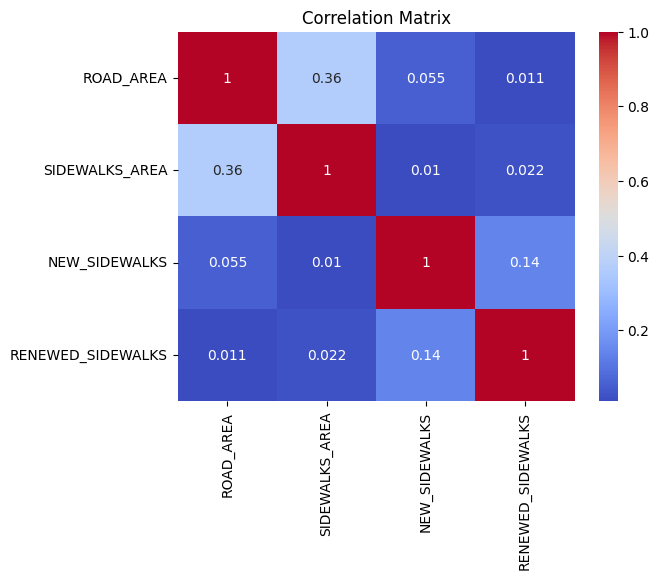